In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [2]:
# Import data and display first 5 rows
features = pd.read_csv('Company_Data.csv')
features.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
features.info() #getting information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (400, 11)


In [5]:
features.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

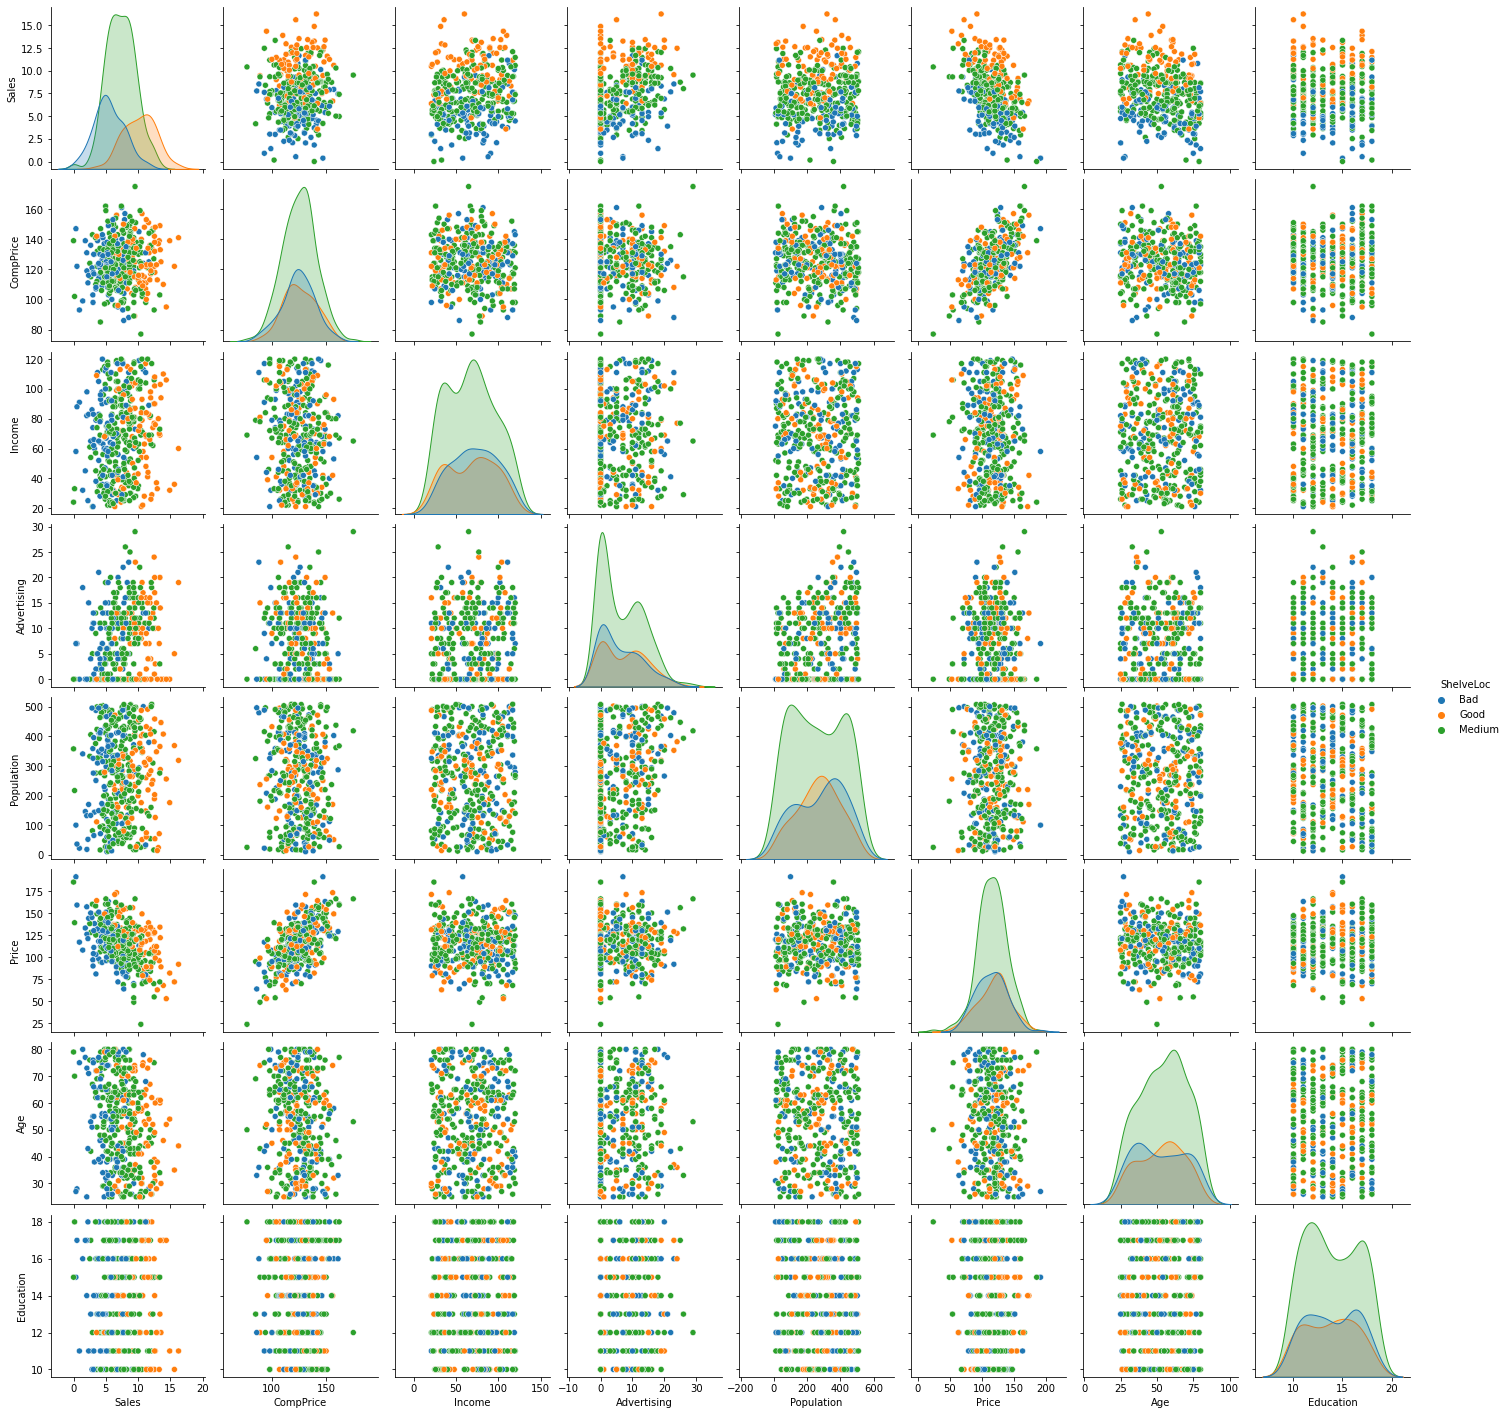

In [6]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=features, hue = 'ShelveLoc')

In [7]:
#Creating dummy vairables dropping first dummy variable
df = pd.get_dummies(features,columns=['Urban','US'], drop_first=True)

In [8]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


In [9]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [10]:
df['ShelveLoc'] = df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [11]:
print(df.head())

   Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0   9.50        138      73           11         276    120          3   42   
1  11.22        111      48           16         260     83          1   65   
2  10.06        113      35           10         269     80          2   59   
3   7.40        117     100            4         466     97          2   55   
4   4.15        141      64            3         340    128          3   38   

   Education  Urban_Yes  US_Yes  
0         17          1       1  
1         10          1       1  
2         12          1       1  
3         14          1       1  
4         13          1       0  


C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

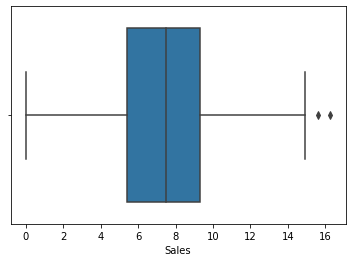

In [12]:
sns.boxplot(df.Sales)

In [13]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [14]:
df['Sales_Category'] = df.Sales.map(lambda x: 1 if x>8 else 0)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales_Category
0,9.50,138,73,11,276,120,3,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,3,38,13,1,0,0


In [15]:
x=df.iloc[:,1:11]
y=df['Sales_Category']

In [16]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0


In [17]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales_Category, dtype: int64

In [18]:
df['Sales_Category'].unique()

array([1, 0], dtype=int64)

In [19]:
df.Sales_Category.value_counts()

0    236
1    164
Name: Sales_Category, dtype: int64

In [20]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes',
 'Sales_Category']

In [21]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

### Building Decision Tree Classifier using Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

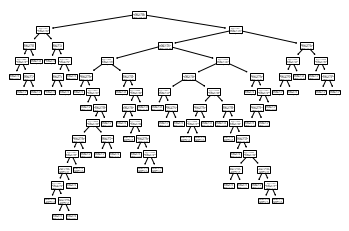

In [23]:
tree.plot_tree(model); #PLot the decision tree

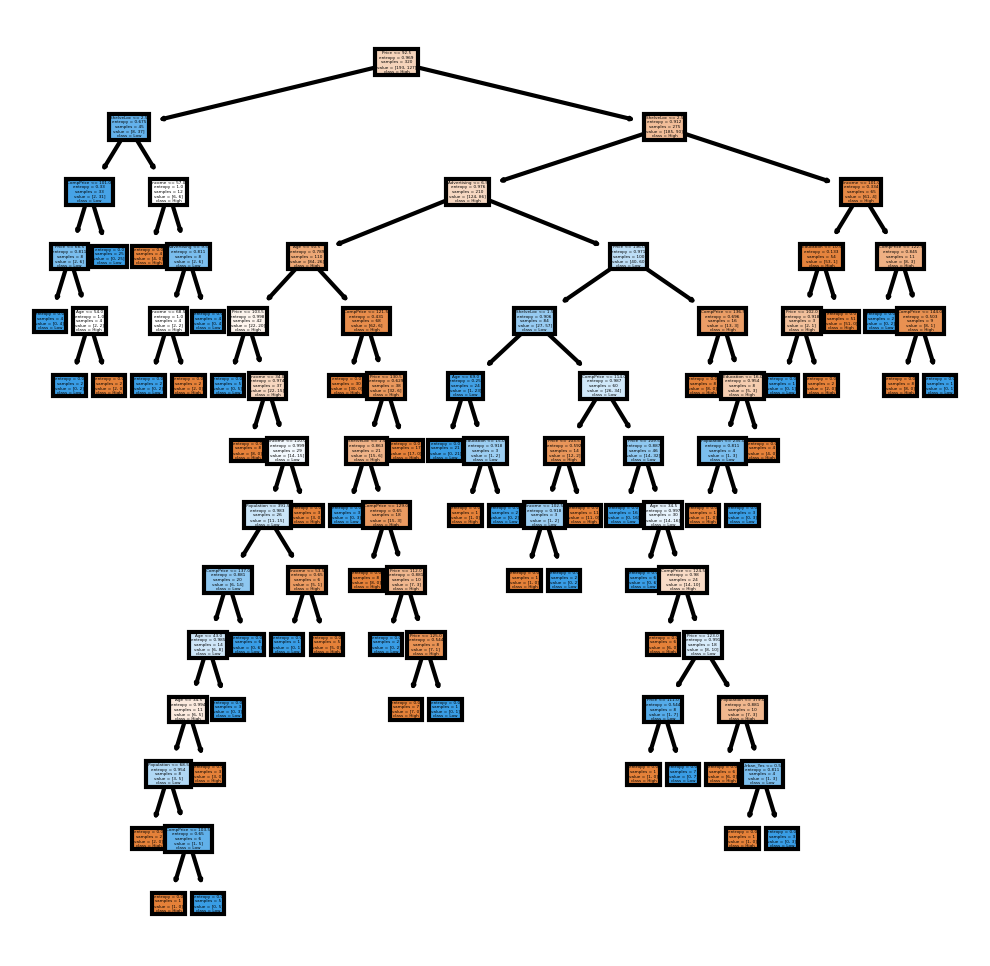

In [24]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [25]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    41
0    39
dtype: int64

In [26]:
preds

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [27]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_Category,,
0,30,13
1,9,28


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.725

### Building Decision Tree Classifier using Entropy Criteria and max_depth = 3

In [29]:
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

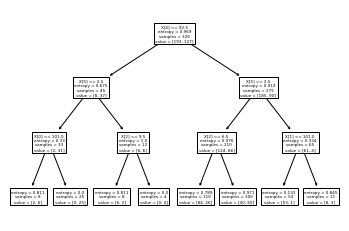

In [30]:
tree.plot_tree(model2); #PLot the decision tree

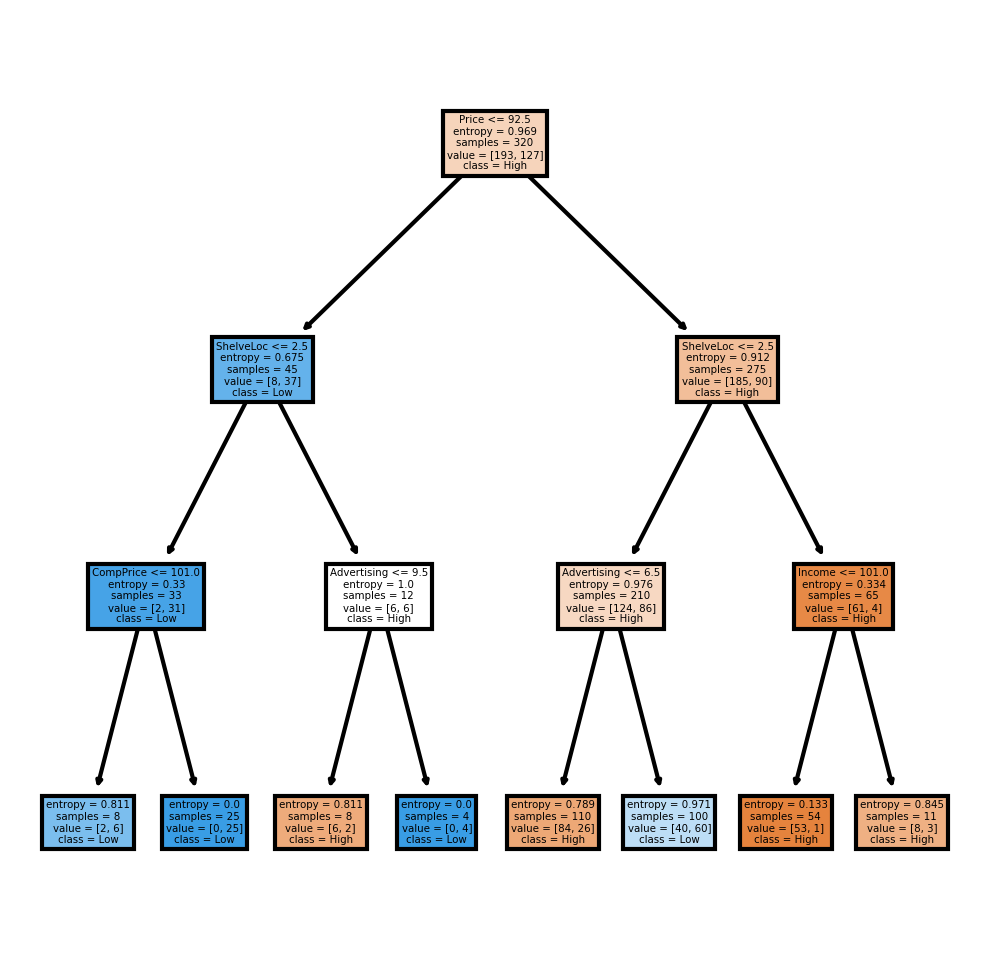

In [31]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
#Predicting on test data
preds2 = model2.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    41
0    39
dtype: int64

In [33]:
preds2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [34]:
pd.crosstab(y_test,preds2) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_Category,,
0,31,12
1,10,27


In [35]:
# Accuracy 
np.mean(preds2==y_test)

0.725

### Building Decision Tree Classifier (CART) using Gini Criteria

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [37]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

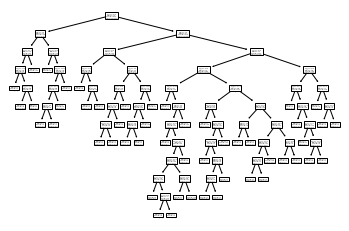

In [38]:
tree.plot_tree(model_gini); #PLot the decision tree

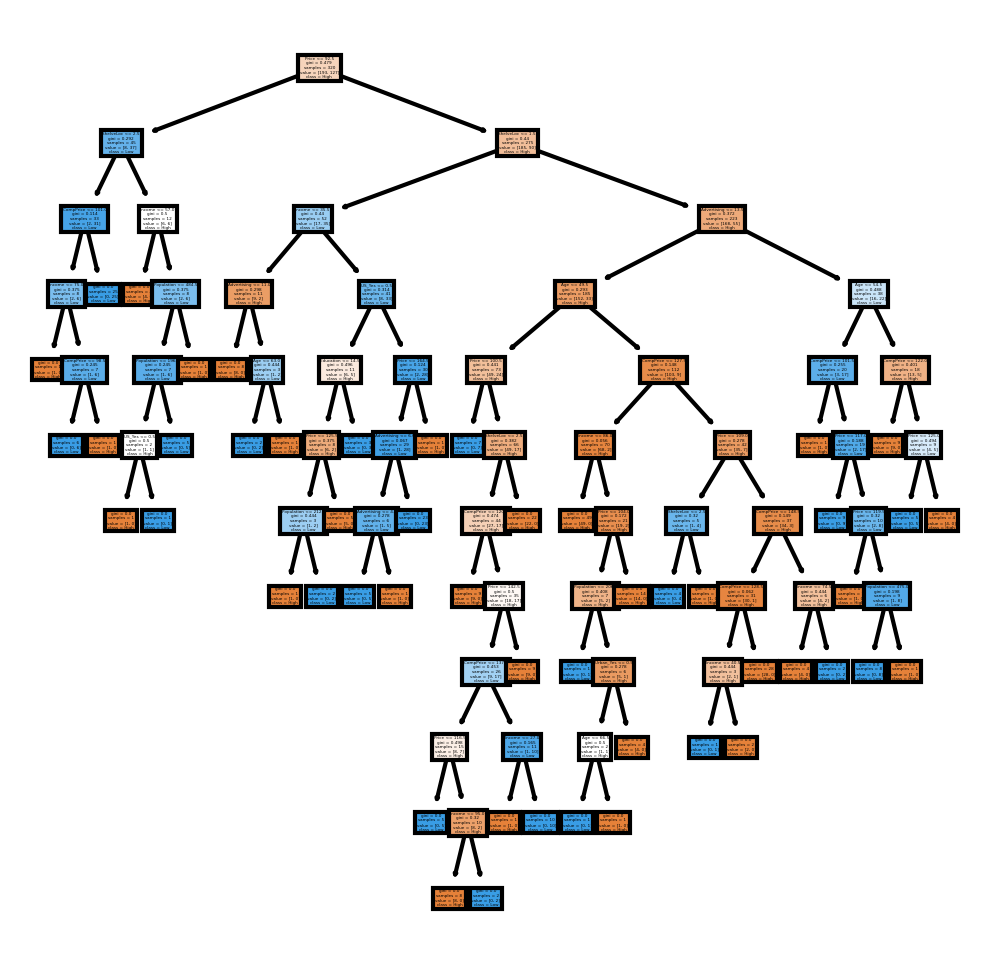

In [39]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [40]:
#Predicting on test data
pred_gini = model_gini.predict(x_test) # predicting on test data set 
pd.Series(pred_gini).value_counts() # getting the count of each category 

0    44
1    36
dtype: int64

In [41]:
pred_gini

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [42]:
pd.crosstab(y_test,pred_gini) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_Category,,
0,35,8
1,9,28


In [43]:
# Accuracy 
np.mean(pred_gini==y_test)

0.7875

### Building Decision Tree Classifier (CART) using Gini Criteria and max_depth = 3

In [44]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth = 3)

In [45]:
model_gini2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

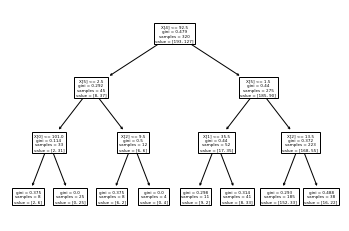

In [46]:
tree.plot_tree(model_gini2); #PLot the decision tree

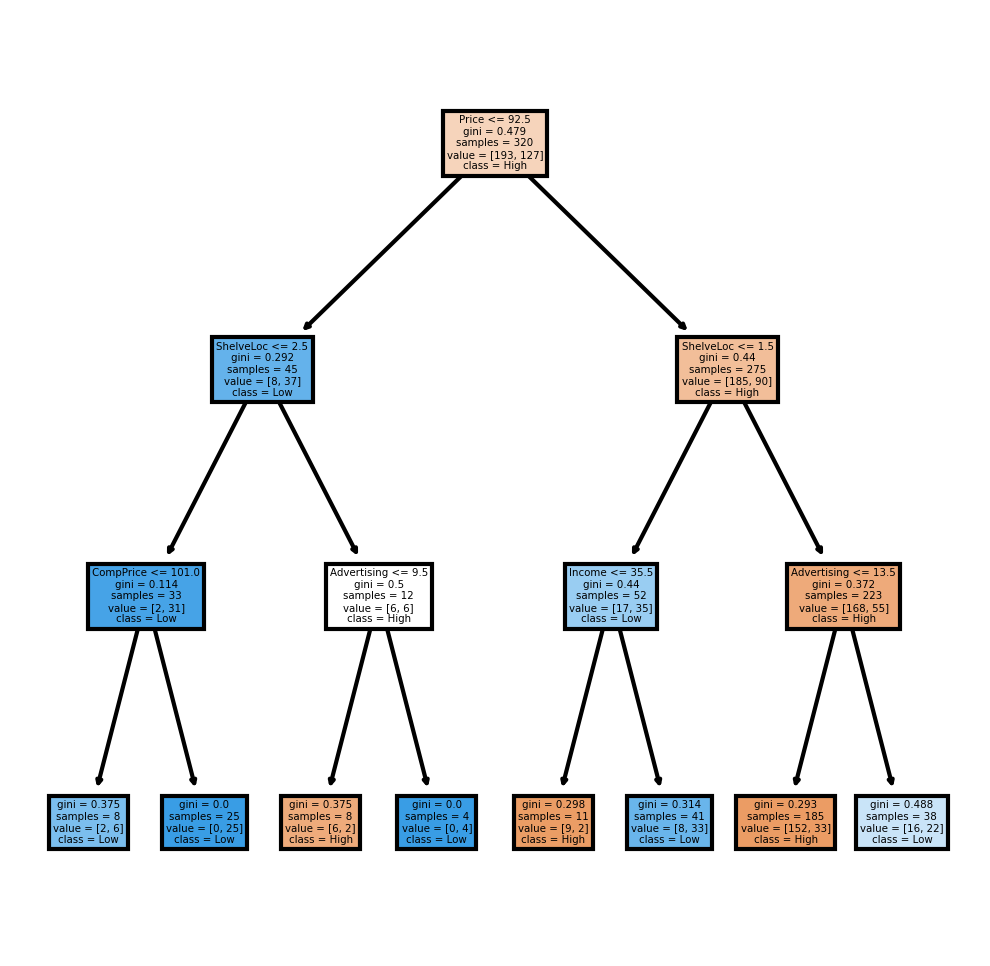

In [47]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn=['High', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [48]:
#Predicting on test data
pred_gini2 = model_gini2.predict(x_test) # predicting on test data set 
pd.Series(pred_gini2).value_counts() # getting the count of each category 

0    42
1    38
dtype: int64

In [49]:
pred_gini2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [50]:
pd.crosstab(y_test,pred_gini2) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_Category,,
0,33,10
1,9,28


In [51]:
# Accuracy 
np.mean(pred_gini2==y_test)

0.7625

#### Decision Tree Regression Example

In [52]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [53]:
X=df.iloc[:,1:11]
Y=df['Sales']
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0


In [54]:
Y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [56]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [57]:
#Find the accuracy
model.score(X_test,Y_test)

0.2698910953779463